In [39]:
from os import listdir
from os.path import isdir, join
import os
import glob, re
import random
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# See how many files are in each
pasta = "idle" 
datapath = os.getcwd() + "\\DataSet\\" + pasta
num_samples=0
num_samples_per_target = len(listdir(datapath))
print(num_samples_per_target)
num_samples += len(listdir(os.getcwd() + "/DataSet/" + pasta))
print('Total samples:', num_samples)

20
Total samples: 20


In [41]:
NUMBER_ROWS = 63
NUMBER_COlUMNS = 64
DEPTH = 4

In [42]:
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [43]:
files = []
filenames = []

idx = []
#i_f = [[],[]]
i_f = np.empty((50, 0)).tolist()
#fln = [[],[]]
fln = np.empty((50, 0)).tolist()
files = glob.glob(datapath + "/*.csv")
files.sort(key=os.path.getmtime)
x = len(files)
if (x % DEPTH) != 0:
    dif = x % DEPTH
    files = files[:x-dif] 
print("N files: ", len(files))

dat = ""
fc = 0
for i, f in enumerate(files):
    if i == 0:
        dat = f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]
        fln[fc].append(f)
        fl = f.split('_')[-1]
        i_f[fc].append(int(fl.split('.')[0]))
    else:
        if dat == (f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]):
            fln[fc].append(f)
            fl = f.split('_')[-1]
            i_f[fc].append(int(fl.split('.')[0]))
        else:
            fc += 1
            print(fc)
            dat = f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]
            fln[fc].append(f)
            fl = f.split('_')[-1]
            i_f[fc].append(int(fl.split('.')[0]))
    
for x in i_f:
    idx.append(np.argsort(np.array(x)))
   
    #print(np.array(fln[:5]))
    #print(np.array(i_f[:5]))
    #print(np.array(idx[:5]))
 
for w, z in enumerate(idx):
    for i in range(0, len(z)-3):
        if len(z) > 4:
            aux = []
            aux.append(fln[w][z[i]])
            aux.append(fln[w][z[i+1]])
            aux.append(fln[w][z[i+2]])
            aux.append(fln[w][z[i+3]])
            filenames.append(aux)

print(len(filenames))
#print(filenames)

   

N files:  20
17


In [44]:
# Only keep the specified number of samples (shorter extraction / training)
print(len(filenames))

17


In [45]:
filenam = []
z = []
print(datapath)
filenam.append(listdir(datapath))
z.append(np.ones(len(filenam)))
filenam = [item for sublist in filenam for item in sublist]
z = [item for sublist in z for item in sublist]

c:\Users\Iman\Desktop\Stage\code\code_dataset\DataSet\idle


In [46]:
# Read CSV
def readCSV(filename):
    data = np.loadtxt(filename, dtype = np.float32, delimiter = ' ')
    return data

In [47]:
# MIN-MAX Function
def min_max(in_files, in_z):
    # Numpy arrays to store train, test and val matrix
    min = 5000
    max = 0
    count = 0
    
    for index, filename in enumerate(in_files):
        
        # Create path from given filename and target item
        path = join(datapath,filename)
        
        # Check to make sure weŕe reading a .wav file
        if not path.endswith('.csv'):
            continue
        

        heatmap = readCSV(path)

        #print(heatmap.shape)
        
        min = np.minimum(min, np.min(heatmap))
        max = np.maximum(max, np.max(heatmap))
        #print("MIN: " + str(min) + "\tMAX: " + str(max))
        #print(index)
        count += 1
        
    print("Count: " + str(count))
    print("MIN: " + str(min) + "\tMAX: " + str(max))
            
    return min, max


In [48]:
global min_m
global max_m
min_m, max_m = min_max(filenam, z)


Count: 20
MIN: 1320.0	MAX: 5024.0


In [49]:
# Function: take heatmap data para o dataset
def build_dataset(in_files):
    # Numpy arrays to store train, test and val matrix
    global min_m
    global max_m

    
    num = len(in_files) * NUMBER_ROWS 
    out_x = np.zeros((num, NUMBER_COlUMNS, DEPTH), dtype = np.float32)

    

    for index, filename in enumerate(in_files):

        
        # Create path from given filename and target item
        path = join(datapath,filename[0])
        #print(path)
        path1 = join(datapath,filename[1])
        path2 = join(datapath,filename[2])
        path3 = join(datapath,filename[3])
        
        # Check to make sure weŕe reading a .wav file
        if not path.endswith('.csv'):
            continue
        

        heatmap = readCSV(path)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*NUMBER_ROWS:index*NUMBER_ROWS+NUMBER_ROWS, : , 0] = aux_n2

        heatmap = readCSV(path1)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*NUMBER_ROWS:index*NUMBER_ROWS+NUMBER_ROWS, : , 1] = aux_n2


        heatmap = readCSV(path2)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*NUMBER_ROWS:index*NUMBER_ROWS+NUMBER_ROWS, : , 2] = aux_n2


        heatmap = readCSV(path3)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*NUMBER_ROWS:index*NUMBER_ROWS+NUMBER_ROWS, : , 3] = aux_n2


        #print(out_x[index].shape)
        
    print("X: " + str(out_x.shape))
        

    return out_x


In [50]:
# Create train, validation, and test sets
x_test= build_dataset(filenames)


X: (1071, 64, 4)


['c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_15.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_16.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_17.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_18.csv']
(63, 64, 4)
(63, 64)


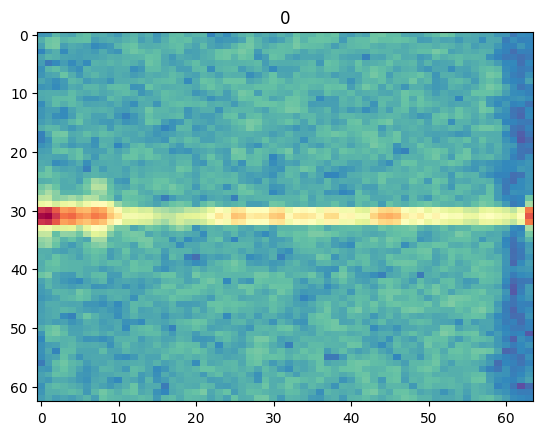

(63, 64)


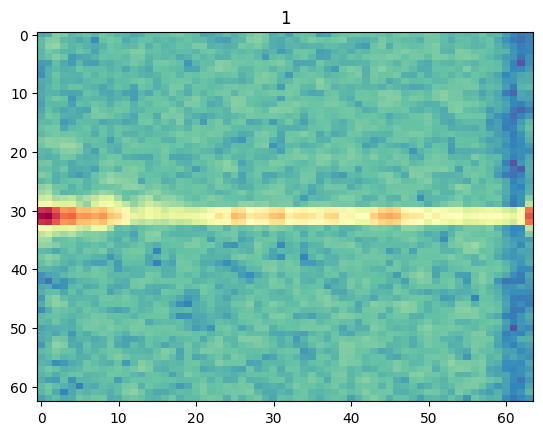

(63, 64)


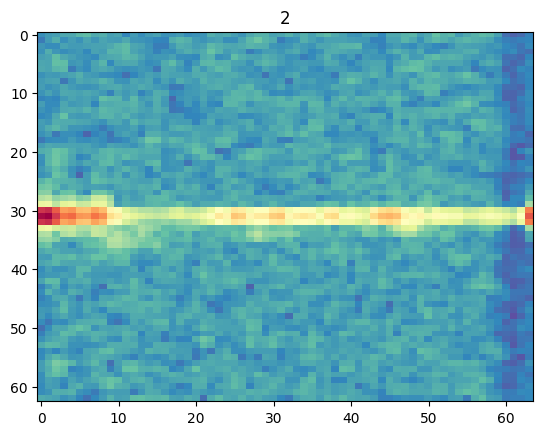

(63, 64)


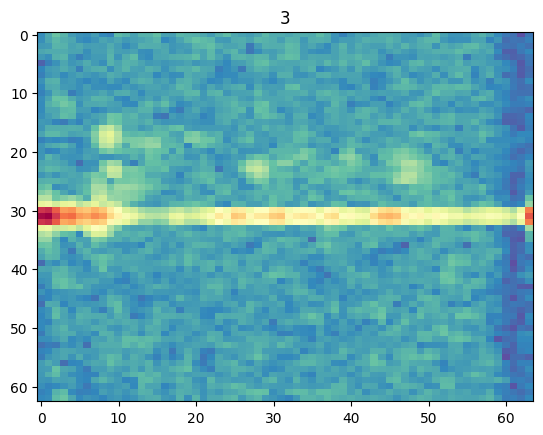

In [51]:
# Print a pack of 4 samples for a given class
count = 0

index_de_amostra = 15
print(filenames[index_de_amostra])
x_traint = x_test[63*index_de_amostra:63*(index_de_amostra+1),:,:].reshape(
                          NUMBER_ROWS,
                          NUMBER_COlUMNS,
                          DEPTH)
print(x_traint.shape)
for x in range(0,4,1): 
    f = x_traint[:,:,x]
    print(f.shape)
    # read the csv file
    plt.imshow(f, cmap='Spectral_r', interpolation='nearest', aspect='auto')
    plt.title(count)
    plt.show()
    count+=1


In [52]:
for i in range(0,5):
    print(filenames[i])

['c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_0.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_1.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_2.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_3.csv']
['c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_1.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_2.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_3.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_4.csv']
['c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_2.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\code_dataset\\DataSet\\idle\\idle_2024_6_3_15_2_56_3.csv', 'c:\\Us

In [53]:
# Save features and truth vector (y) sets to disk in a npz archive
print(pasta)
feature_sets_file='all_targets_' + str(int(min_m)) + '_' + str(int(max_m)) + '_' + pasta + '_classes_' + str(num_samples_per_target) + '.npz'
np.savez(feature_sets_file,x_test=x_test)


idle


In [60]:
# Starting the test
# TEST: Load features
feature_sets = np.load(os.getcwd() + '\\all_targets_1320_5024.npz')
#feature_sets = np.load(feature_sets_file) # Test the generated NPZ
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [61]:
x_test = feature_sets['x_test']
count = 0
files = x_test.reshape(int(x_test.shape[0]/NUMBER_ROWS),
                        NUMBER_ROWS,
                        NUMBER_COlUMNS,
                        DEPTH)

print(files[count,:,:,0].shape)

(63, 64)


In [62]:
print(x_test.shape)

(378, 64, 4)


In [63]:
print(len(x_test)/63)

6.0


In [64]:
len(feature_sets['x_train'])

1890

In [65]:
len(feature_sets['y_train'])

30

In [66]:
len(feature_sets['x_val'])

378

In [67]:
len(feature_sets['y_val'])

6

In [68]:
len(feature_sets['x_test'])

378

In [69]:
len(feature_sets['y_test'])

6